# Assignment 4

The assignment 4 contains 3 questions and the due date is May 9th (Sunday) 23:59PM.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1 Celonis Automation Bootcamp (20 points)

In this question, you are simply asked to complete the bootcamp and upload the badge or compleion proof. 


In [2]:
# Done

## Question 2 Training a deep neural network (80 points)

Practice training a deep neural network on the CIFAR10 image dataset:


In [3]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170508288/170498071 [==============================] - 2s 0us/step


### Question 2.1 (10 points) 

Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_ data() (see code below). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 5000 of which is for validation, 10,000 for testing) with 10 classes using sparse_categorical_crossentropy loss function , so you’ll need a softmax output layer with 10 neurons. 

Train the model for 100 epochs, explain whether the model will experience overfitting. 

What to do here: 
- DNN mit: 20 hidden layers á 100 neurons (RELU activation function)
- Load data mit keras.datasets.cifar10.load_ data()
- Train DNN on CIFAR10 dataset mit Adam Optimization
- Softmax output layer mit 10 neurons
- Compile, train, report, plot

In [4]:
from tensorflow.keras.datasets import cifar10 

In [5]:
# Define class names over which the dataset is distributed
class_names = ["airplane","automobile","bird","cat","deer","dog","frog",
               "horse","ship","truck"]

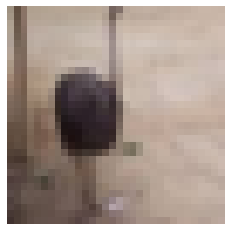

In [6]:
# Let's check an image to see what we have in our set 
plt.imshow(X_train[333], cmap = "binary")
plt.axis("off")
plt.show()

In [7]:
# Let's build a NN model 
cifar10_model = tf.keras.models.Sequential()

In [8]:
# Input layer
cifar10_model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

# Create 20 hidden layers
for n_hidden in range(20):
    cifar10_model.add(keras.layers.Dense(100, activation="relu"))

# Output layer: SOFTMAX activation as it gives the probabilities of each class
cifar10_model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [10]:
# Compile and train the model 
cifar10_model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

n_epochs = 100
history = cifar10_model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 16s 10ms/step - loss: 2.1029 - accuracy: 0.1752 - val_loss: 2.0498 - val_accuracy: 0.1824
Epoch 2/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0185 - accuracy: 0.1980 - val_loss: 2.0018 - val_accuracy: 0.2114
Epoch 3/100
1407/1407 [==============================] - 13s 10ms/step - loss: 1.9896 - accuracy: 0.2113 - val_loss: 1.9808 - val_accuracy: 0.2152
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.9716 - accuracy: 0.2192 - val_loss: 2.0598 - val_accuracy: 0.2196
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9478 - accuracy: 0.2358 - val_loss: 1.9429 - val_accuracy: 0.2372
Epoch 6/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.9247 - accuracy: 0.2526 - val_loss: 1.9233 - val_accuracy: 0.2538
Epoch 7/100
1407/1407 [==============================] - 13s 10ms/step - loss: 1.9107 - accuracy: 0.2584 - val_loss: 2.

In [11]:
test_loss, test_accuracy = cifar10_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7640 - accuracy: 0.3287


In [12]:
print("Test accuracy: {}".format(test_accuracy))
print("")
print("Test loss: {}".format(test_loss))


Test accuracy: 0.3287000060081482

Test loss: 1.763992428779602


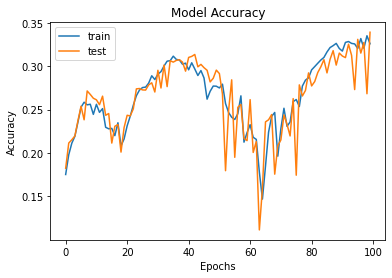

In [13]:
# Plot history for the model's accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

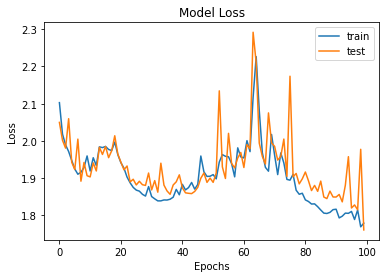

In [14]:
# Plot history for the model's loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

The plots of the model's accuracy and loss functions demonstrate that overfitting happens after a few epochs as the training and test dataset intercept. The accuracy of the model is just 32.87% and needs to be improved. 

### Question 2.2 (10 points)

Try reduce the overfitting with weight regularization. You can try to add a L2-norm penalty term as the kernel_regularizer. Repeat the previous training process and explain whether regularization helps achieve a better result.

In [15]:
keras.backend.clear_session()
from tensorflow.keras import regularizers

cifar10_model2 = tf.keras.models.Sequential()

In [16]:
# Input layer
cifar10_model2.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

# Create 20 hidden layers
for n_hidden in range(20):
    cifar10_model2.add(keras.layers.Dense(100, activation="relu",
                                          kernel_initializer="he_normal",
                                          kernel_regularizer=keras.regularizers.l2(0.01)))

# Output layer: SOFTMAX activation as it gives the probabilities of each class
cifar10_model2.add(keras.layers.Dense(10, activation="softmax",
                                      kernel_initializer="he_normal",
                                      kernel_regularizer=keras.regularizers.l2(0.01)))

In [17]:
cifar10_model2.compile(loss="sparse_categorical_crossentropy", 
                      optimizer="adam", 
                      metrics=["accuracy"])
n_epochs = 100
history2 = cifar10_model2.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 17s 11ms/step - loss: 26.8955 - accuracy: 0.1950 - val_loss: 20.8446 - val_accuracy: 0.2624
Epoch 2/100
1407/1407 [==============================] - 15s 11ms/step - loss: 17.8644 - accuracy: 0.2743 - val_loss: 15.0509 - val_accuracy: 0.3010
Epoch 3/100
1407/1407 [==============================] - 15s 11ms/step - loss: 12.6896 - accuracy: 0.3029 - val_loss: 10.4232 - val_accuracy: 0.3032
Epoch 4/100
1407/1407 [==============================] - 15s 11ms/step - loss: 8.5217 - accuracy: 0.3071 - val_loss: 6.7763 - val_accuracy: 0.3238
Epoch 5/100
1407/1407 [==============================] - 15s 11ms/step - loss: 5.4443 - accuracy: 0.2954 - val_loss: 4.3068 - val_accuracy: 0.2874
Epoch 6/100
1407/1407 [==============================] - 15s 11ms/step - loss: 3.5335 - accuracy: 0.2829 - val_loss: 2.9970 - val_accuracy: 0.2482
Epoch 7/100
1407/1407 [==============================] - 16s 11ms/step - loss: 2.6692 - accuracy: 0.2705 - val_l

In [18]:
test_loss, test_accuracy = cifar10_model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.2219 - accuracy: 0.2615


In [19]:
print("Test accuracy: {}".format(test_accuracy))
print("")
print("Test loss: {}".format(test_loss))


Test accuracy: 0.2615000009536743

Test loss: 2.2218711376190186


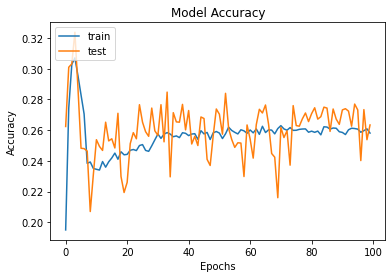

In [20]:
# Plot history for the model's accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

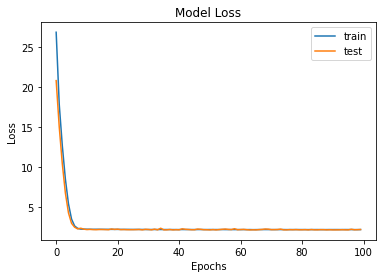

In [21]:
# Plot history for the model's loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

To reduce overfitting, Layer 2 regularization has been applied. The reduction of the overfitting, as can be observed in the graph, worked out. The However, the l2 regularization has decreased the models accuracy to 26.15%. Adjustments necessary. 

### Question 2.3 (10 points)

Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [82]:
keras.backend.clear_session()
from tensorflow.keras import regularizers

cifar10_model3 = tf.keras.models.Sequential()

In [83]:
# Input layer
cifar10_model3.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
cifar10_model3.add(keras.layers.BatchNormalization())

# Create 20 hidden layers
for n_hidden in range(19):
    cifar10_model3.add(keras.layers.Dense(100, activation="relu",
                                          kernel_initializer="he_normal",
                                          kernel_regularizer=keras.regularizers.l2(0.01)))
    cifar10_model3.add(keras.layers.BatchNormalization())

# Output layer: SOFTMAX activation as it gives the probabilities of each class
cifar10_model3.add(keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01)))

In [84]:
# Check the four parameters per input of our BN
bn1 = cifar10_model3.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [85]:
# Update the moving averages
bn1.updates

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  


[]

In [86]:
# Compile and train the model
cifar10_model3.compile(loss="sparse_categorical_crossentropy", 
                      optimizer="adam", 
                      metrics=["accuracy"])
n_epochs = 100
history3 = cifar10_model3.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 40s 23ms/step - loss: 27.4374 - accuracy: 0.1941 - val_loss: 16.3289 - val_accuracy: 0.2614
Epoch 2/100
1407/1407 [==============================] - 32s 23ms/step - loss: 10.4989 - accuracy: 0.2669 - val_loss: 6.2847 - val_accuracy: 0.2634
Epoch 3/100
1407/1407 [==============================] - 32s 23ms/step - loss: 4.3022 - accuracy: 0.2616 - val_loss: 3.0188 - val_accuracy: 0.2248
Epoch 4/100
1407/1407 [==============================] - 31s 22ms/step - loss: 2.8214 - accuracy: 0.1839 - val_loss: 2.6504 - val_accuracy: 0.1146
Epoch 5/100
1407/1407 [==============================] - 32s 23ms/step - loss: 2.4110 - accuracy: 0.1862 - val_loss: 2.5022 - val_accuracy: 0.1304
Epoch 6/100
1407/1407 [==============================] - 32s 22ms/step - loss: 2.6475 - accuracy: 0.1637 - val_loss: 2.7613 - val_accuracy: 0.0992
Epoch 7/100
1407/1407 [==============================] - 32s 23ms/step - loss: 2.3844 - accuracy: 0.1846 - val_loss

In [87]:
test_loss, test_accuracy = cifar10_model3.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 2.2469 - accuracy: 0.1639


In [88]:
print("Test accuracy: {}".format(test_accuracy))
print("")
print("Test loss: {}".format(test_loss))

Test accuracy: 0.1639000028371811

Test loss: 2.2468936443328857


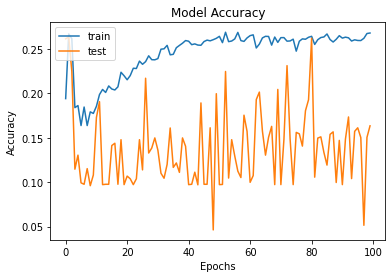

In [89]:
# Plot history for the model's accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

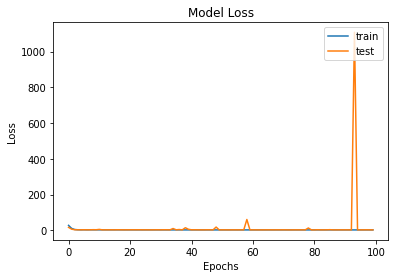

In [90]:
# Plot history for the model's loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Is it converging faster than before? Does it produce a better model? How does it affect training speed?

Batch normalization decreases the model accuracy by rougly 10%points. Also, we can observe that the fit of the model is drastically worse. I assume that there is a model parameter falsly set or some mistake in the code. Because of the time the runs of the code takes, a new parameter adjustment couldnt be undertaken.

### Question 2.4 (10 points)

Try regularizing the model with dropout. Then, without retraining your model, see if you can achieve better accuracy using different rate of Dropout.

In [91]:
keras.backend.clear_session()
from tensorflow.keras.layers import Dropout

cifar10_model4 = tf.keras.models.Sequential()

In [92]:
# Input layer
cifar10_model4.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
cifar10_model4.add(keras.layers.BatchNormalization())
cifar10_model4.add(keras.layers.Dropout(rate=0.1))

# Create 20 hidden layers
for n_hidden in range(20):
    cifar10_model4.add(keras.layers.Dense(100, activation="relu",
                                          kernel_initializer="he_normal",
                                          kernel_regularizer=keras.regularizers.l2(0.01)))    
    cifar10_model4.add(keras.layers.BatchNormalization())

cifar10_model4.add(keras.layers.Dropout(rate=0.1))
# Output layer: SOFTMAX activation as it gives the probabilities of each class
cifar10_model4.add(keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01)))

In [93]:
# Compile and train the model
cifar10_model4.compile(loss="sparse_categorical_crossentropy", 
                      optimizer="adam", 
                      metrics=["accuracy"])
n_epochs = 100
history4 = cifar10_model4.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 39s 23ms/step - loss: 30.4033 - accuracy: 0.1679 - val_loss: 19.7941 - val_accuracy: 0.2094
Epoch 2/100
1407/1407 [==============================] - 33s 23ms/step - loss: 13.5267 - accuracy: 0.2410 - val_loss: 8.7492 - val_accuracy: 0.2378
Epoch 3/100
1407/1407 [==============================] - 32s 23ms/step - loss: 5.9581 - accuracy: 0.2446 - val_loss: 4.0903 - val_accuracy: 0.2236
Epoch 4/100
1407/1407 [==============================] - 33s 24ms/step - loss: 3.2451 - accuracy: 0.1982 - val_loss: 2.7136 - val_accuracy: 0.1408
Epoch 5/100
1407/1407 [==============================] - 32s 23ms/step - loss: 2.6797 - accuracy: 0.1702 - val_loss: 3.1696 - val_accuracy: 0.1544
Epoch 6/100
1407/1407 [==============================] - 34s 24ms/step - loss: 2.6001 - accuracy: 0.1584 - val_loss: 2.7387 - val_accuracy: 0.1432
Epoch 7/100
1407/1407 [==============================] - 34s 24ms/step - loss: 2.4739 - accuracy: 0.1710 - val_loss

In [94]:
test_loss, test_accuracy = cifar10_model4.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 2.5939 - accuracy: 0.1441


In [95]:
print("Test accuracy: {}".format(test_accuracy))
print("")
print("Test loss: {}".format(test_loss))

Test accuracy: 0.14409999549388885

Test loss: 2.593912363052368


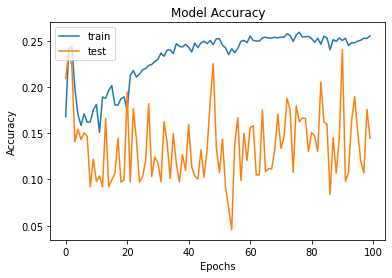

In [96]:
# Plot history for the model's accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

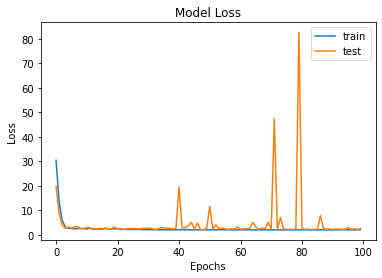

In [97]:
# Plot history for the model's loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Adding dropout to our model slightly improved our accuracy. Without dropout, we achieved an accuracy of 10%. With dropout, it went up to 14%. We can observe heavy overfitting in the model.

### Question 2.5 (10 points) 

Add Earlystopping to the model and save the model at the early stopping epoch using the callbacks. 

Last, load the model and evaluate on the test set.

In [98]:
keras.backend.clear_session()

cifar10_model5 = tf.keras.models.Sequential()

In [99]:
# Input layer
cifar10_model5.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
cifar10_model5.add(keras.layers.BatchNormalization())
cifar10_model5.add(keras.layers.Dropout(rate=0.1))

# Create 20 hidden layers
for n_hidden in range(20):
    cifar10_model5.add(keras.layers.Dense(100, activation="relu"))
    cifar10_model5.add(keras.layers.BatchNormalization())

cifar10_model5.add(keras.layers.Dropout(rate=0.1))
# Output layer: SOFTMAX activation as it gives the probabilities of each class
cifar10_model5.add(keras.layers.Dense(10, activation="softmax"))

In [101]:
# Compile the model
cifar10_model5.compile(loss="sparse_categorical_crossentropy", 
                      optimizer="adam", 
                      metrics=["accuracy"])

# Add earlystopps using callbacks
early_stop_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Train the model
n_epochs = 50
history5 = cifar10_model5.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stop_cb])

Epoch 1/50
1407/1407 [==============================] - 39s 23ms/step - loss: 1.9889 - accuracy: 0.2669 - val_loss: 1.8125 - val_accuracy: 0.3384
Epoch 2/50
1407/1407 [==============================] - 31s 22ms/step - loss: 1.8477 - accuracy: 0.3366 - val_loss: 1.7509 - val_accuracy: 0.3674
Epoch 3/50
1407/1407 [==============================] - 29s 21ms/step - loss: 1.7612 - accuracy: 0.3734 - val_loss: 1.6639 - val_accuracy: 0.3946
Epoch 4/50
1407/1407 [==============================] - 29s 21ms/step - loss: 1.7011 - accuracy: 0.3944 - val_loss: 1.6449 - val_accuracy: 0.3902
Epoch 5/50
1407/1407 [==============================] - 28s 20ms/step - loss: 1.6559 - accuracy: 0.4146 - val_loss: 1.5511 - val_accuracy: 0.4490
Epoch 6/50
1407/1407 [==============================] - 28s 20ms/step - loss: 1.6086 - accuracy: 0.4317 - val_loss: 1.5067 - val_accuracy: 0.4712
Epoch 7/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.5707 - accuracy: 0.4472 - val_loss: 1.5526 -

In [102]:
test_loss, test_accuracy = cifar10_model5.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.3573 - accuracy: 0.5348


In [103]:
print("Test accuracy: {}".format(test_accuracy))
print("")
print("Test loss: {}".format(test_loss))

Test accuracy: 0.5347999930381775

Test loss: 1.357337236404419


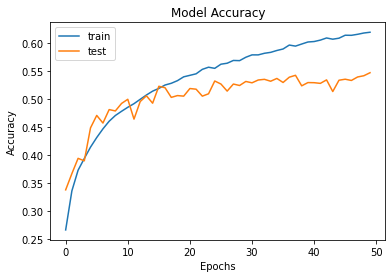

In [118]:
# Plot history for the model's accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

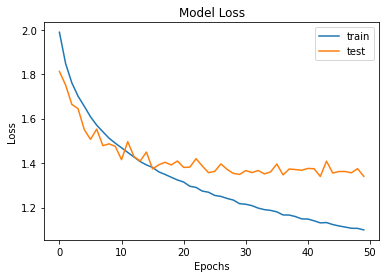

In [119]:
# Plot history for the model's loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Adding earlystopping to our model significantly increased the performance of our accuracy. We were now able to achive an accuracy of 53.47%. Yet, the model would need more improvement as an accuracy of 53% is not sufficient. Also, in the model we can still see that overfitting occurs.


It must be said that the model did not stopped earlier than the epochs we set. Also, we just trained the model on epochs = 50 instead of = 100 because of time constraints. 

### Question 2.6 Convolutional Neural Network (15 points)

Now, let's define the Convolutional Neural Network. 

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task

Estimate the model using the same compilation configuration and report your test accuracy. 

In [106]:
keras.backend.clear_session()

cifar10_model6 = tf.keras.models.Sequential()

In [107]:
# First Layer
cifar10_model6.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
# Max Pooling Layer
cifar10_model6.add(tf.keras.layers.MaxPool2D(pool_size=2))
# Second Layer
cifar10_model6.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model6.add(tf.keras.layers.MaxPool2D(pool_size=2))
# Third Layer
cifar10_model6.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model6.add(tf.keras.layers.MaxPool2D(pool_size=3))
# Flattening Layer
cifar10_model6.add(tf.keras.layers.Flatten())
# Adding the first fully connected layer
cifar10_model6.add(tf.keras.layers.Dense(units=120,activation='relu'))
# Adding the second fully connected layer
cifar10_model6.add(tf.keras.layers.Dense(units=60,activation='relu'))
# Droput Layer
cifar10_model6.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
# Output Layer
cifar10_model6.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [108]:
cifar10_model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [110]:
# Compile and train the model
cifar10_model6.compile(loss="sparse_categorical_crossentropy", 
                      optimizer="adam", 
                      metrics=["accuracy"])
n_epochs = 2
history6 = cifar10_model6.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1407/1407 [==============================] - 106s 75ms/step - loss: 1.6234 - accuracy: 0.4057 - val_loss: 1.4198 - val_accuracy: 0.4880
Epoch 2/2
1407/1407 [==============================] - 104s 74ms/step - loss: 1.4007 - accuracy: 0.5061 - val_loss: 1.2161 - val_accuracy: 0.5694


In [111]:
test_loss, test_accuracy = cifar10_model6.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.2181 - accuracy: 0.5716


In [112]:
print("Test accuracy: {}".format(test_accuracy))
print("")
print("Test loss: {}".format(test_loss))

Test accuracy: 0.5716000199317932

Test loss: 1.2180843353271484


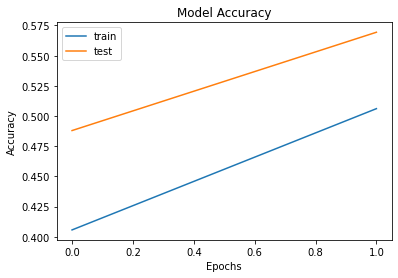

In [113]:
# Plot history for the model's accuracy
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

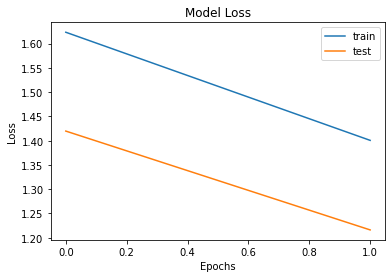

In [114]:
# Plot history for the model's loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Using the model I was able to get an accuracy of 57.16%, which is 4%points better than the results we received in the model above. 

Yet, I have to stress that the results just ran on epochs = 2 for demonstration purposes. I did not have enough time to run the model on epochs = 100. 


*Inspiration for solving this task was taken from: https://towardsdatascience.com/deep-learning-with-cifar-10-image-classification-64ab92110d79*

### Question 2.7 Transfer learning (15 points)

In this question, we will use the [VGG-16 Neural Network](https://neurohive.io/en/popular-networks/vgg16/), a well-known architecture that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, this architecture has already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks. 

The idea is that first layers are not specialized for the particular task it has been trained on; only the last ones are. Therefore, we will load the existing VGG16 network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of VGG-16, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

Write a function that takes the previous model as input the set the girst layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`. Then write a function that adds flattening and dense layers after the first convolutional layers. You can define each layer (or group of layers) separately and concatenate them using the classic `layers.Sequential()` like below: 

```
model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])
```

Replicate the above steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous VGG-16 model.

Estimate the model using the same compilation configuration and report the test accuracy. 

1. Write function that loads VGG16 model 
2. Write function taht take 1. as input and set the first layers to be non trainable 
3. Check out summary of the model
4. Write function that adds flattening and dense layers after first conv. layers
5. Replicate by adding a flattening and two dense layers (first with 500 neurons) to the model created in 4.
6. Compile 
7. Report test accuracy

In [64]:
keras.backend.clear_session()

def load_model():
  vgg16_model = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(32,32,3)
  )
  
  return vgg16_model, vgg16_model.summary()

In [65]:
# Function that takes the model as input and set trainable = False
def non_train(model):
  model.trainable = False
  
  return model, model.summary()

In [75]:
# Function that adds flattening and dense layers after first conv. layers
def model_layer(model_input):
  model = model_input
  flattening = tf.keras.layers.Flatten(input_shape=[32,32,3])
  dense1 = tf.keras.layers.Dense(units=500,activation='relu')
  dense2 = tf.keras.layers.Dense(units=100,activation='relu')
  prediction = tf.keras.layers.Dense(units=10,activation='softmax')

  model7 = tf.keras.models.Sequential([
                                       model,
                                       flattening,
                                       dense1,
                                       dense2
                                       ])

  return model7, model7.summary()

In [76]:
vgg16_model = load_model()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [77]:
model_nT = non_train(vgg16_model[0])

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [78]:
cifar10_model7 = model_layer(model_nT[0])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 500)               256500    
                                                                 
 dense_7 (Dense)             (None, 100)               50100     
                                                                 
Total params: 15,021,288
Trainable params: 306,600
Non-trainable params: 14,714,688
_________________________________________________________________


In [81]:
# Compile and train the model
cifar10_model7[0].compile(loss="sparse_categorical_crossentropy", 
                      optimizer="adam", 
                      metrics=["accuracy"])
n_epochs = 2
history7 = cifar10_model7[0].fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1407/1407 [==============================] - 553s 393ms/step - loss: 4.6071 - accuracy: 0.0999 - val_loss: 4.6052 - val_accuracy: 0.1010
Epoch 2/2
1407/1407 [==============================] - 571s 406ms/step - loss: 4.6070 - accuracy: 0.0999 - val_loss: 4.6052 - val_accuracy: 0.1010


In [116]:
test_loss, test_accuracy = cifar10_model7[0].evaluate(X_test, y_test)

313/313 [==============================] - 108s 345ms/step - loss: 4.6052 - accuracy: 0.1000


In [117]:
print("Test accuracy: {}".format(test_accuracy))
print("")
print("Test loss: {}".format(test_loss))

Test accuracy: 0.10000000149011612

Test loss: 4.60518217086792
